# Phase 3 - word cloud

In [253]:
import pickle
import matplotlib.pyplot as plt 
from collections import Counter
from gensim import matutils, models
import scipy.sparse

In [144]:
import pandas as pd
import re
import os

def add_tweets_in_df(target_file_path):
    """
    @param: 
    target_file_path: string - usually a csv file
    target_dataframe - pandas.df
    
    @return:
    result_df - pandas data frame
    """
    df = pd.read_csv(target_file_path)
    df = df[["text"]]
    tweetlist = df['text'].tolist()
    return tweetlist

# this function will iterate files in each folder and write dataframes
# into new csv files, and return the dataframes for future uses
def write_csv(target_folder_name):
    """
    ptype: folder_naem - str
    rtype: month_list - list
    """
    month_list = {}
    for file in os.listdir(target_folder_name):
        if file[-4:] == '.csv':
            df = add_tweets_in_df(target_folder_name + file)
            month_list[file[:-4]] = df
    return month_list

In [145]:
# We are going to change this to key: vaccine tweets, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [235]:
vaccine_dictionary = write_csv('data/vaccine/')
safety_dictionary = write_csv('data/safety/')
covid_dictionary = write_csv('data/covid/')

In [181]:
safety_dictionary['2020_05'] = safety_dictionary.pop('safety_may_20')
safety_dictionary['2020_06'] = safety_dictionary.pop('safety_june_20')
safety_dictionary['2020_07'] = safety_dictionary.pop('safety_july_20')
safety_dictionary['2020_10'] = safety_dictionary.pop('safety_oct_20')
safety_dictionary['2020_03'] = safety_dictionary.pop('safety_march_20')
safety_dictionary['2020_12'] = safety_dictionary.pop('safety_dec_20')
safety_dictionary['2020_02'] = safety_dictionary.pop('safety_feb_20')
safety_dictionary['2020_04'] = safety_dictionary.pop('safety_april_20')
safety_dictionary['2021_02'] = safety_dictionary.pop('safety_feb_21')
safety_dictionary['2020_11'] = safety_dictionary.pop('safety_nov_20')
safety_dictionary['2020_08'] = safety_dictionary.pop('safety_august_20')
safety_dictionary['2020_09'] = safety_dictionary.pop('safety_sept_20')
safety_dictionary['2021_01'] = safety_dictionary.pop('safety_jan_21')

In [211]:
vaccine_dictionary['2020_05'] = vaccine_dictionary.pop('vaccine_may_20')
vaccine_dictionary['2020_06'] = vaccine_dictionary.pop('vaccine_june_20')
vaccine_dictionary['2020_07'] = vaccine_dictionary.pop('vaccine_july_20')
vaccine_dictionary['2020_10'] = vaccine_dictionary.pop('vaccine_oct_20')
vaccine_dictionary['2020_03'] = vaccine_dictionary.pop('vaccine_march_20')
vaccine_dictionary['2020_12'] = vaccine_dictionary.pop('vaccine_dec_20')
vaccine_dictionary['2020_02'] = vaccine_dictionary.pop('vaccine_feb_20')
vaccine_dictionary['2020_04'] = vaccine_dictionary.pop('vaccine_april_20')
vaccine_dictionary['2021_02'] = vaccine_dictionary.pop('vaccine_feb_21')
vaccine_dictionary['2020_11'] = vaccine_dictionary.pop('vaccine_nov_20')
vaccine_dictionary['2020_08'] = vaccine_dictionary.pop('vaccine_august_20')
vaccine_dictionary['2020_09'] = vaccine_dictionary.pop('vaccine_sept_20')
vaccine_dictionary['2021_01'] = vaccine_dictionary.pop('vaccine_jan_21')

In [237]:
covid_dictionary['2020_05'] = covid_dictionary.pop('covid_may_20')
covid_dictionary['2020_06'] = covid_dictionary.pop('covid_june_20')
covid_dictionary['2020_07'] = covid_dictionary.pop('covid_july_20')
covid_dictionary['2020_10'] = covid_dictionary.pop('covid_oct_20')
covid_dictionary['2020_03'] = covid_dictionary.pop('covid_march_20')
covid_dictionary['2020_12'] = covid_dictionary.pop('covid_dec_20')
covid_dictionary['2020_02'] = covid_dictionary.pop('covid_feb_20')
covid_dictionary['2020_04'] = covid_dictionary.pop('covid_april_20')
covid_dictionary['2021_02'] = covid_dictionary.pop('covid_feb_21')
covid_dictionary['2020_11'] = covid_dictionary.pop('covid_nov_20')
covid_dictionary['2020_08'] = covid_dictionary.pop('covid_august_20')
covid_dictionary['2020_09'] = covid_dictionary.pop('covid_sept_20')
covid_dictionary['2021_01'] = covid_dictionary.pop('covid_jan_21')


## Word cloud for COVID

In [271]:
dictionary = covid_dictionary

In [272]:
# Combine it and then transpose the data
data_combined = {key: [combine_text(value)] for (key, value) in dictionary.items()}

data_df = pd.DataFrame.from_dict(data_combined).transpose() 
data_df.columns = ['transcript']
data_df = data_df.sort_index()

In [273]:
import re, string

# cleaning the data
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower() # make all text to lowercase
    text = re.sub('\[.*?\]', '', text) # getting rid of data in brackets. See the usage of sub
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #get rid of punctuation marks
    text = re.sub('\w*\d\w*', '', text) #\d all digits, \w alphanumeric. Get rid of words containing numbers
    return text

round1 = lambda x: clean_text_round1(x)

# Apply a second round of cleaning tweets specific cleaning
def clean_text_round2(row):
    row = row.lower()
    #remove urls
    row  = re.sub(r'http\S+', '', row)
    #remove mentions
    row = re.sub(r"(?<![@\w])@(\w{1,25})", '', row)
    #remove hashtags
    row = re.sub(r"(?<![#\w])#(\w{1,25})", '',row)
    #remove other special characters
    row = re.sub('[^A-Za-z .-]+', '', row)
    #remove digits
    row = re.sub('\d+', '', row)
    row = re.sub('rt', '', row)
    row = row.strip(" ")
    return row

round2 = lambda x: clean_text_round2(x)



In [274]:
# Cleaning data through round1 and round2 functions which were creaed above
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))


In [275]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') #first instantiate CountVectorizer object and the also removing stopwords here
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index

In [276]:
# Let's pickle the document term matrix for later use
data_dtm.to_pickle("dtm_tweets.pkl")
data_clean.to_pickle('data_clean_tweets.pkl')
pickle.dump(cv, open("cv_tweets.pkl", "wb"))

In [277]:
# Let's first Read in the document-term matrix. Reading in the pickle file
data = pd.read_pickle('dtm_tweets.pkl')
data = data.transpose()

In [278]:
# Find the top 30 words in all the months for vaccine related tweets
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))  ## zip combines two list

# Let's first pull out the top 30 words for each month in vaccines
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        

In [291]:
add_stop_words = ['just','dont','el','que','en','por','del','los','vaccine','se','es','like','da','al','una',
                  'casos','la','covid','coronavirus','amp','mask','masks','got','says','say','need','y','para'
                  ,'o','las']

In [292]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text #text contains the stopword list for sklearn
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean_tweets.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words) #adding my new stopword list into the already existing English stopword in sklearn

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words) #new count vectorizer object that includes new stop words
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index #new document-term matrix that excludes those stopwords

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop_tweets.pkl", "wb"))
data_stop.to_pickle("dtm_stop_tweets.pkl")

In [293]:
# Let's make some word clouds! 
from wordcloud import WordCloud

#create word cloudn object
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

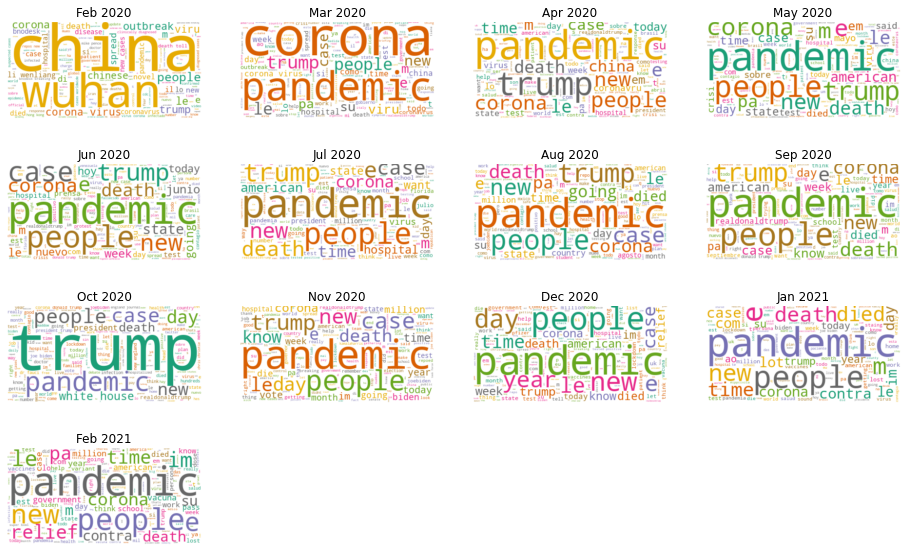

In [294]:
# plotting the word cloud object
plt.rcParams['figure.figsize'] = [16, 10]
full_names = ['Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020',
              'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020', 'Jan 2021','Feb 2021']

for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Observations from word cloud of COVID

- We removed few words like - coronavirus, covid to get better results in the word cloud.
- __Feb 2020__: As the virues just started, we can see alot of mention about __China, wuhan__ and __outbreak__.
- __Pandemic__ is common across all the 13 months. similarly, __Trump__ seems to be there till 2020 and starts to disappear from 2021.
- __Death__ is one of the highlights in the month of April, May and september as expected. April was the month when covid death count started to increase. In september, Coronavirus was its peak.
- __Nov 2020__: This month has a mention of __Vote__ reflecting on the election month
- __Feb 2021__ : Jan has a mention of __relief__ , as the relief packages were in news


## Word cloud for Vaccine

In [256]:
dictionary = vaccine_dictionary

In [257]:
# Combine it and then transpose the data
data_combined = {key: [combine_text(value)] for (key, value) in dictionary.items()}

data_df = pd.DataFrame.from_dict(data_combined).transpose() 
data_df.columns = ['transcript']
data_df = data_df.sort_index()

In [258]:
# Cleaning data through round1 and round2 functions which were creaed above
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))

In [260]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') #first instantiate CountVectorizer object and the also removing stopwords here
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index

# Let's pickle the document term matrix for later use
data_dtm.to_pickle("dtm_vaccine.pkl")
data_clean.to_pickle('data_clean_vaccine.pkl')
pickle.dump(cv, open("cv_vaccine.pkl", "wb"))


In [261]:
# Let's first Read in the document-term matrix. Reading in the pickle file
data = pd.read_pickle('dtm_vaccine.pkl')
data = data.transpose()

# Find the top 30 words in all the months for vaccine related tweets
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))  ## zip combines two list

# Let's first pull out the top 30 words for each month in vaccines
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        

# Read in cleaned data
data_clean = pd.read_pickle('data_clean_vaccine.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words) #adding my new stopword list into the already existing English stopword in sklearn

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words) #new count vectorizer object that includes new stop words
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index #new document-term matrix that excludes those stopwords

# Pickle it for later use
pickle.dump(cv, open("cv_stop_vaccine.pkl", "wb"))
data_stop.to_pickle("dtm_stop_vaccine.pkl")
        

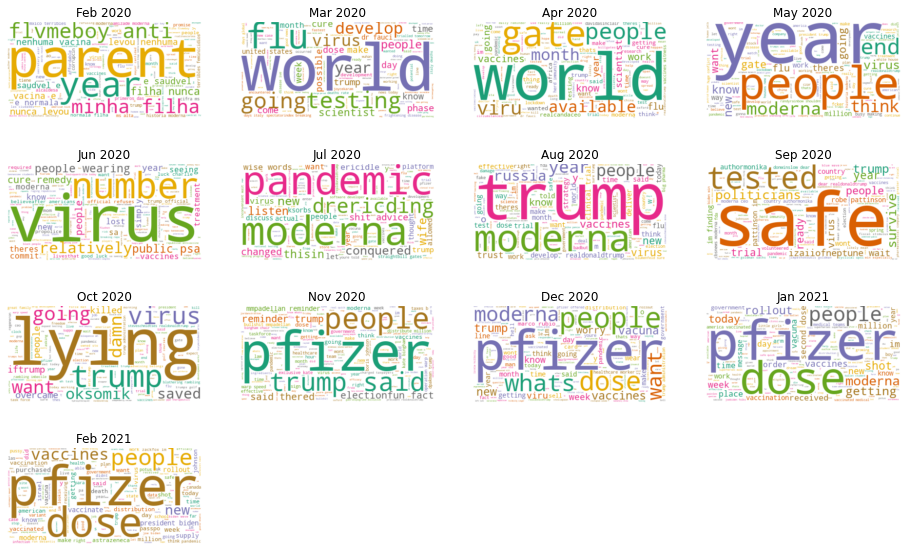

In [262]:
# plotting the word cloud object
plt.rcParams['figure.figsize'] = [16, 10]
full_names = ['Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020',
              'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020', 'Jan 2021','Feb 2021']

for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Observations from word cloud of Vaccine

- We removed few words like - vaccine, vaccines to get better results in the word cloud.
- __Feb 2020__: As the virues just started, we can see alot of mention about __anti__, its due to the mention of rise in anti china and anti asian sentiments.
- __Mar 2020__: March 2020 shows words like develop and testing as the world governments were starting with vaccines preperations.
- __Moderna__ was the highlight before and after phase 2 results - July and August 2020.
- __Oct 2020__ highlights __lying__. This is the time when President Trump got COVID and twitteratis suspected the result.
- __Pfizer__ Once the vaccine phase 3 result came in november, there is mention of pfizer in almost all the months. Also, __dose__ is the highlight in past three months as people took the vaccines.

## Word cloud for Safety

In [264]:
dictionary = safety_dictionary

# Combine it and then transpose the data
data_combined = {key: [combine_text(value)] for (key, value) in dictionary.items()}

data_df = pd.DataFrame.from_dict(data_combined).transpose() 
data_df.columns = ['transcript']
data_df = data_df.sort_index()

# Cleaning data through round1 and round2 functions which were creaed above
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))

# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') #first instantiate CountVectorizer object and the also removing stopwords here
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index

# Let's pickle the document term matrix for later use
data_dtm.to_pickle("dtm_safety.pkl")
data_clean.to_pickle('data_clean_safety.pkl')
pickle.dump(cv, open("cv_safety.pkl", "wb"))


In [265]:
# Let's first Read in the document-term matrix. Reading in the pickle file
data = pd.read_pickle('dtm_safety.pkl')
data = data.transpose()

# Find the top 30 words in all the months for vaccine related tweets
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))  ## zip combines two list

# Let's first pull out the top 30 words for each month in vaccines
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        

# Read in cleaned data
data_clean = pd.read_pickle('data_clean_safety.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words) #adding my new stopword list into the already existing English stopword in sklearn

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words) #new count vectorizer object that includes new stop words
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index #new document-term matrix that excludes those stopwords

# Pickle it for later use
pickle.dump(cv, open("cv_stop_safety.pkl", "wb"))
data_stop.to_pickle("dtm_stop_safety.pkl")

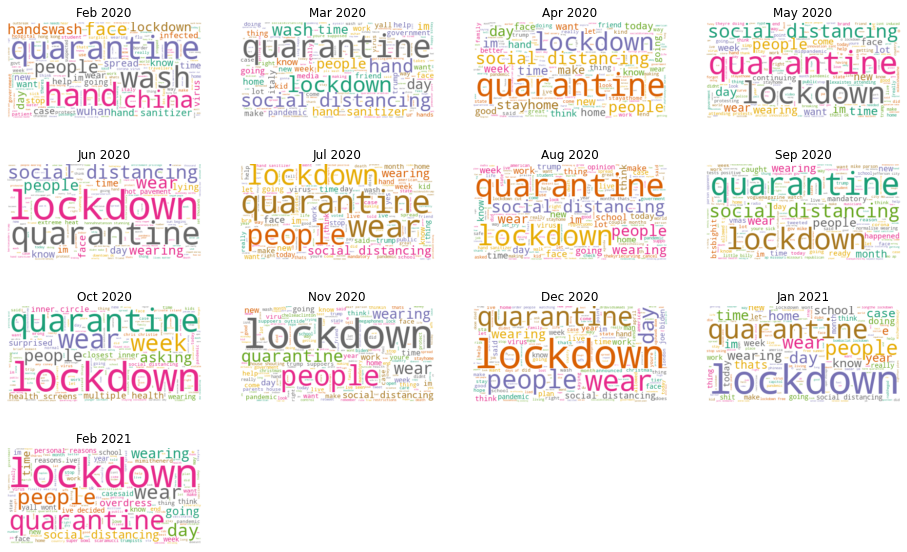

In [266]:
# plotting the word cloud object
plt.rcParams['figure.figsize'] = [16, 10]
full_names = ['Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020',
              'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020', 'Jan 2021','Feb 2021']

for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Observations from word cloud of Safety

- As we collected tweets with keywords like social distancing, safety, and quarantine. There is nothing negative or interesting about these tweets.
- The tweets are similar across all the 13 months.